In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# Biodiversity Characterisation Factors

Data Source: https://zenodo.org/records/10114493

In [15]:
def getCFs():
    """
    Reads the file for characterization factors (CFs) by ecoregion,
    prepares the data, and returns a pandas DataFrame.
    """
    # read the CFs by ecoregion and show some basic info
    filepath = "data/PDF/CF.csv"
    df_CF = pd.read_csv(filepath, delimiter=",", encoding='latin1')
    print(f"Columns: {df_CF.columns}")
    print(f"Number of unique ecoregions: {df_CF['eco_id'].nunique()}")

    #convert eco_id to integer for better matching
    df_CF['eco_id'] = df_CF['eco_id'].astype(int)
    print(df_CF.loc[0])

    return df_CF

# Ecoregions

Data source: https://www.worldwildlife.org/publications/terrestrial-ecoregions-of-the-world

In [16]:
def getEcoregions():
    """
    Loads the ecoregions shapefile and performs basic inspections.
    """
    # Load the ecoregions shapefile
    df_ecoregions = gpd.read_file("data/ecoregions/official/wwf_terr_ecos.shp")

    # Inspect the dataset
    #print(ecoregions.head())
    print(f"Columns: {df_ecoregions.columns}")
    print(f"Number of unique ecoregions: {df_ecoregions['ECO_ID'].nunique()}")
    print(f"Total ecoregions: {len(df_ecoregions)}")

    #convert ECO_ID to integer for better plotting
    df_ecoregions['ECO_ID'] = df_ecoregions['ECO_ID'].astype(int)

    return df_ecoregions

In [17]:
def plotEcoregions(df_ecoregions):
    """
    Plots the ecoregions with different colors for each ECO_ID.
    """
    # Create a plot with different colors for each ECO_ID
    fig, ax = plt.subplots(figsize=(10, 6))


    # Plot with colors based on ECO_ID
    df_ecoregions.plot(column='ECO_ID', 
                cmap='tab20',  # Use a colormap with distinct colors
                legend=False,  # Don't show legend (too many categories)
                ax=ax,
                edgecolor='white',
                linewidth=0.1)

    plt.title("World Ecoregions", fontsize=16)
    plt.axis('off')  # Remove axes for cleaner look
    plt.tight_layout()
    plt.show()

# Mining sites polygons - Maus

Data source: https://doi.pangaea.de/10.1594/PANGAEA.942325

## Description file

In [18]:
def getPolygonDatasetDescription():
    """
    Loads the polygon dataset description and prints its content.
    """
    file_path = "data/mining/maus/Maus-etal_2022_V2.tab"

    with open(file_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            print(f"Line {i + 1}: {line.strip()}")

## Polygons

In [19]:
def getMiningPolygons():
    """
    Loads the global mining polygons shapefile and performs basic inspections.
    """
    # Load the mining polygons shapefile
    file_path = "data/mining/maus/global_mining_polygons_v2.gpkg"  
    df_mining_polygons = gpd.read_file(file_path)

    # Inspect the data
    print(df_mining_polygons.columns)

    # Check the CRS (Coordinate Reference System)
    print("CRS:", df_mining_polygons.crs)

    return df_mining_polygons

In [20]:
def plotMiningPolygons(df_mining_polygons):
    """
    Plots the mining polygons.
    """
    df_mining_polygons.plot(figsize=(10, 6), edgecolor="black", color="orange")
    plt.title("Global Mining Polygons")
    plt.show()

# Mining Data - Jasansky

Data source: https://zenodo.org/records/7369478

## Facilities

In [21]:
def getFacilities():
    """
    Loads the facilities GeoPackage and performs basic inspections.
    """
    # Load the facilities GeoPackage
    gpkg_path = "data/facilities/facilities.gpkg"
    df_facilities = gpd.read_file(gpkg_path)

    # Inspect the data
    #print(df_facilities.head())
    print("Columns:", df_facilities.columns)
    print("CRS:", df_facilities.crs)
    print(df_facilities.loc[0])

    return df_facilities

In [22]:
def plotFacilities(df_facilities):
    """
    Plots the mining facilities.
    """
    df_facilities.plot(figsize=(10, 6), color="orange", edgecolor="black")
    plt.title("Mining Facilities")
    plt.show()

### Additional Attributes

In [ ]:
print("Unique primary commodities:")
print(df_facilities['primary_commodity'].unique())

# Unique commodities/products
print("\nUnique commodities/products:")
print(df_facilities['commodities_products'].unique())

Unique primary commodities:
['Copper' 'Iron' 'Coal' 'Gold' 'Processing' 'Nickel' 'Aluminium' 'Silver'
 'Zinc' 'Other mine' 'Other (poly)-metallic']

Unique commodities/products:
['Copper, Zinc, Gold, Silver' 'Iron ore' 'Sub-bituminous coal'
 'Alumina, Calcined soda'
 'Steel, rebar, steel bar, steel meshes, wire rod, barbed wire' 'Gold'
 'Nickel, Copper, Cobalt, Gold, PGM'
 'Crude Steel, Hot-rolled steel sheet, Steel plate, Chrome plate, Tin plate, Cold-rolled sheet, Structural steel profiles'
 'Thermal coal' 'Coal' 'Copper, Silver, Gold'
 'Copper, Silver, Copper cathode, Gold' 'Bauxite' 'Silver, Gold, Copper'
 'Aluminium' 'Zinc, Lead'
 'Aluminium rod, T-foundry, Molten metal, High purity, Remelt'
 'Aluminium high purity, Remelt' 'Zinc, Silver, Lead, Copper'
 'Bauxite, Alumina' 'Copper, Gold' 'Copper' 'Alumina'
 'Gold, Copper, Silver' 'Platinum, Palladium' 'Nickel, Cobalt' 'Pig iron'
 'Metallurgical coal' 'Copper, Molybdenum, Silver' 'Iron'
 'Aluminium, Aluminium ingots, Aluminium sow i

In [ ]:
# Count facility types
facility_types = df_facilities['facility_type'].value_counts()
print("\nFacility types and counts:")
print(facility_types)


Facility types and counts:
facility_type
Mine                       2066
Smelter                      96
Refinery                     67
Refinery, Smelter            57
Smelter, Refinery            55
Mine, Refinery               33
Region                       13
Company                      10
Mine, Smelter                 7
Mine, Refinery, Smelter       5
Concentrator                  3
Mine, Smelter, Refinery       1
Name: count, dtype: int64


In [ ]:
# Earliest and latest production start dates
print("\nProduction start dates:")
print(df_facilities['production_start'].min(), "to", df_facilities['production_start'].max())

# Count active facilities by year
active_status = df_facilities['activity_status'].value_counts()
print("\nFacility activity status:")
print(active_status)


Production start dates:
1554.0 to 2020.0

Facility activity status:
activity_status
active                  27
inactive                14
Project                  9
in development           5
care and maintenance     4
Exploration              3
Advanced exploration     2
exploration              2
Under construction       1
construction             1
stopped 31.12.2013       1
Name: count, dtype: int64


In [ ]:
len(df_facilities)

2413

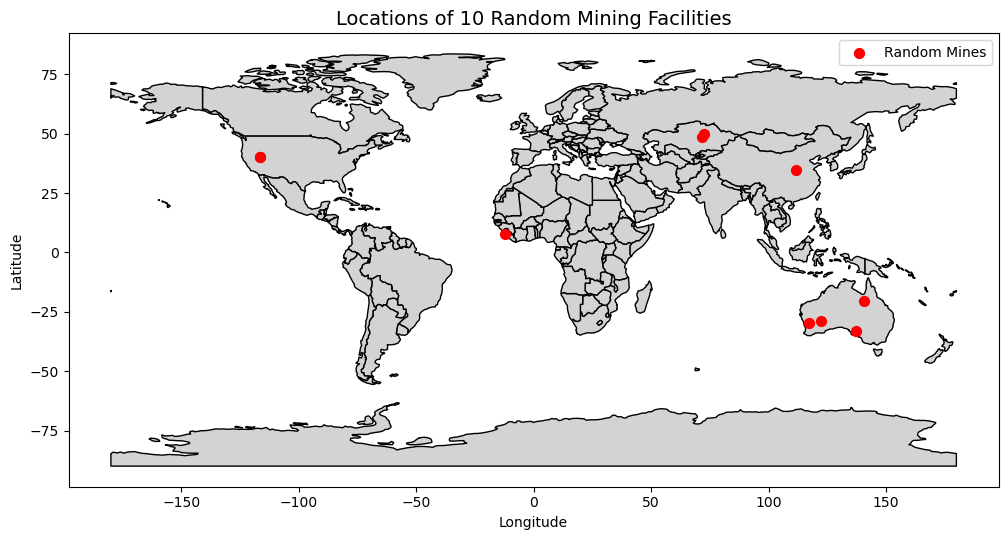


Table of 10 Random Mining Facilities:
╒══════╤═════════════════╤═════════════════════╤════════════════════════════════════╤══════════════════════════╤═══════════════════╤══════════════════════╕
│      │ facility_type   │ primary_commodity   │ commodities_products               │ country                  │ activity_status   │   surface_area_sq_km │
╞══════╪═════════════════╪═════════════════════╪════════════════════════════════════╪══════════════════════════╪═══════════════════╪══════════════════════╡
│  293 │ Mine            │ Gold                │ Gold                               │ United States of America │                   │                  nan │
├──────┼─────────────────┼─────────────────────┼────────────────────────────────────┼──────────────────────────┼───────────────────┼──────────────────────┤
│ 1636 │ Mine            │ Copper              │ Copper, Gold                       │ Australia                │                   │                  nan │
├──────┼─────────────────

In [ ]:
from tabulate import tabulate

# Step 1: Select 10 random mines
random_mines = df_facilities.sample(10, random_state=11)  # Set random_state for reproducibility

# Step 2: Plot their location
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the world basemap
world_path = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_path)
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the random mines
random_mines.plot(ax=ax, color='red', markersize=50, label="Random Mines")

# Add plot title and legend
plt.title("Locations of 10 Random Mining Facilities", fontsize=14)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Step 3: Print a nicely formatted table
# Truncate the table to relevant columns
columns_to_display = [
    # "facility_name", 
    "facility_type", 
    "primary_commodity", 
    "commodities_products", 
    "country", 
    # "production_start", 
    # "production_end", 
    'activity_status', 
    'surface_area_sq_km'
]
truncated_table = random_mines[columns_to_display]

# Print the table using tabulate
print("\nTable of 10 Random Mining Facilities:")
print(tabulate(truncated_table, headers='keys', tablefmt='fancy_grid'))

In [ ]:
print("List of all columns in the dataset:")
for column in facilities.columns:
    print(f"- {column}")

List of all columns in the dataset:
- facility_id
- facility_name
- facility_other_names
- sub_site_name
- sub_site_other_names
- facility_type
- primary_commodity
- commodities_products
- facility_equipment
- production_start
- production_end
- activity_status
- activity_status_year
- surface_area_sq_km
- concession_area_sq_km
- country
- GID_0
- GID_1
- GID_2
- GID_3
- GID_4
- source_id
- comment
- geometry


![image.png](attachment:2a4b1779-7924-4702-9c8c-6d9e24ceff0b.png)

## Minerals

In [ ]:
def getMiningMinerals():
    """
    Loads the minerals dataset and performs basic inspections.
    """
    minerals_path = "data/mining/jasansky/data/minerals.csv"
    df_minerals = pd.read_csv(minerals_path)
    print("Columns:", df_minerals.columns)
    print(df_minerals.head(10))

    return df_minerals

Columns: Index(['id', 'facility_id', 'year', 'type', 'material', 'value_tonnes',
       'overall_grade_ppm', 'amount_sold_tonnes', 'mine_processing',
       'reporting_period', 'source_id', 'comment'],
      dtype='object')
   id  facility_id  year           type material  value_tonnes  \
0   1  COM00001.00  2013      Ore mined   O.bulk       1625532   
1   2  COM00001.00  2013  Ore processed   O.bulk       1625532   
2   3  COM00001.00  2014      Ore mined   O.bulk       1452933   
3   4  COM00001.00  2014  Ore processed   O.bulk       1452933   
4   5  COM00001.00  2015      Ore mined   O.bulk       1235053   
5   6  COM00001.00  2015  Ore processed   O.bulk       1235053   
6   7  COM00001.00  2016      Ore mined   O.bulk       1297829   
7   8  COM00001.00  2016  Ore processed   O.bulk       1297829   
8   9  COM00001.00  2017      Ore mined   O.bulk       1014369   
9  10  COM00001.00  2017  Ore processed   O.bulk       1014369   

   overall_grade_ppm  amount_sold_tonnes mine_pro

## Commodities

In [ ]:
def getMiningCommodities():
    """
    Loads the commodities dataset and performs basic inspections.
    """
    commodities_path = "data/mining/jasansky/data/commodities.csv"
    df_commodities = pd.read_csv(commodities_path)
    print("Columns:", df_commodities.columns)
    print(df_commodities.head(10))

    return df_commodities

## Material IDs

In [24]:
def getMaterialIDs():
    """
    Loads the material IDs dataset and performs basic inspections.
    """
    material_ids_path = "data/mining/jasansky/data/material_ids.csv"
    df_material_ids = pd.read_csv(material_ids_path)
    print("Columns:", df_material_ids.columns)
    print(df_material_ids.head(10))

    return df_material_ids

## Source IDs

In [25]:
def getSourceIDs():
    """
    Loads the source IDs dataset and performs basic inspections.
    """
    source_ids_path = "data/mining/jasansky/data/source_ids.csv"
    df_source_ids = pd.read_csv(source_ids_path)
    print("Columns:", df_source_ids.columns)
    print(df_source_ids.head(10))

    return df_source_ids